# EDA (Exploratory Data Analysis)

Vamos a realizar un análisis exploratorio de los datos para entender mejor el problema y los datos que tenemos disponibles.

In [3]:
from _utils import *
import pandas as pd

## **`Cargar los datos`**
Primero cargamos los datos y vemos sus dimensiones.

In [306]:
# Cargamos la informacion de cada moneda durante cada halving
df_halving: pd.DataFrame = pd.read_json('./metadata/halving.json', orient='records')

In [307]:
def read_per_years()-> list[list[dict]]:
    # CArgamos los json de cada año y los unimos
    df_2012: list[dict] = read_json('./metadata/market_data_2012.json')
    df_2013: list[dict] = read_json('./metadata/market_data_2013.json')
    df_2014: list[dict] = read_json('./metadata/market_data_2014.json')
    df_2015: list[dict] = read_json('./metadata/market_data_2015.json')
    df_2016: list[dict] = read_json('./metadata/market_data_2016.json')
    df_2017: list[dict] = read_json('./metadata/market_data_2017.json')
    df_2018: list[dict] = read_json('./metadata/market_data_2018.json')
    df_2019: list[dict] = read_json('./metadata/market_data_2019.json')
    df_2020: list[dict] = read_json('./metadata/market_data_2020.json')
    df_2021: list[dict] = read_json('./metadata/market_data_2021.json')
    df_2022: list[dict] = read_json('./metadata/market_data_2022.json')
    df_2023: list[dict] = read_json('./metadata/market_data_2023.json')
    df_2024: list[dict] = read_json('./metadata/market_data_2024.json')
    return [df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]

In [308]:
df_halving.shape

(2129, 4)

## **`Explorar los datos`**
Luego, exploramos los datos para entender mejor las características de los datos.

`df_coins` es un DataFrame que contiene la información de las monedas.

In [309]:
df_halving.head(3)

,2012-02-12,2016-02-07,2020-03-05,2024-04-20
0,"{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',...","{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',...","{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',...","{'id': '0016aff8-c747-4a03-8e66-e17abaa3e346',..."
1,"{'id': '001adcf3-e807-41b4-a865-92bfce293a55',...","{'id': '001adcf3-e807-41b4-a865-92bfce293a55',...","{'id': '001adcf3-e807-41b4-a865-92bfce293a55',...","{'id': '001adcf3-e807-41b4-a865-92bfce293a55',..."
2,"{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',...","{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',...","{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',...","{'id': '0027fc83-a360-4197-8bb1-b2efaa767558',..."


`df_halving` es un DataFrame que contiene la información del mercado durante cada halving *(2012, 2016, 2020, 2024)* 

## **`Preprocesamiento de los datos`**
Finalmente, realizamos un preprocesamiento de los datos para poder utilizarlos en el entrenamiento de un modelo de machine learning.


Primero vamos a convertir cada halving en un dataset de serie de tiempo para manejar mas facilmente la data

In [310]:
def proccess_coin_in_time(coin: dict) -> list[dict]:
    new_df: list = []
    timestamp = coin["halving"]
    if type(timestamp) == str:
        return new_df
    else:
        for time in timestamp:
            new_coin = coin.copy()
            del new_coin["contractAddresses"]
            del new_coin["halving"]
            del new_coin["allTimeHighData"]
            del new_coin["cycleLowData"]
            new_coin["datetime"] = time["timestamp"]
            new_coin["open"] = time["open"]
            new_coin["high"] = time["high"]
            new_coin["low"] = time["low"]
            new_coin["close"] = time["close"]
            new_coin["volume"] = time["volume"]
            new_df.append(new_coin)
    return new_df

In [311]:
def generate_halving_df(halving) -> pd.DataFrame:
    df = pd.DataFrame()
    for coin in halving:
        new_df= proccess_coin_in_time(coin)
        df = pd.concat([df, pd.DataFrame(new_df)])
    return df

def generate_per_halvings(dataset: pd.DataFrame) -> None:
    # Generamos los datasets de los halving
    for i, halving in enumerate(dataset):
        df_halving: pd.DataFrame = generate_halving_df(dataset[halving])
        df_halving.to_json(f"./datasets/{i+1}_halving.json", orient="records")

In [312]:
def generate_year_df(coins: list[dict]) -> list[dict]:
    df = []
    for coin in coins:
        new_coin = proccess_coin_in_time(coin)
        if new_coin:
            df.extend(new_coin)
    return df


def generate_per_year(dataset: list[list[dict]]) -> None:
    # Generamos los datasets por año
    year = 2012
    for coins in dataset:
        df_year: list[dict] = generate_year_df(coins)
        save_json(df_year, f"./datasets/{year}_market_data.json")
        year += 1

In [313]:
generate_per_halvings(df_halving)

In [314]:
df_years = read_per_years()

In [315]:
generate_per_year(df_years)

Eliminamos variables para evitar problemas de memoria

In [316]:
del df_halving
del df_years

## **`Visualización de los datos`**
Visualizamos los datos para entender mejor las características de los datos y cómo se relacionan entre sí.

In [317]:
import matplotlib.pyplot as plt

In [318]:
df_halving_1 = pd.read_json('./datasets/1_halving.json', orient='records')
df_halving_2 = pd.read_json('./datasets/2_halving.json', orient='records')
df_halving_3 = pd.read_json('./datasets/3_halving.json', orient='records')
df_halving_4 = pd.read_json('./datasets/4_halving.json', orient='records')

In [319]:
def create_df_years():
    df_2012 = pd.read_json('./datasets/2012_market_data.json', orient='records')
    df_2013 = pd.read_json('./datasets/2013_market_data.json', orient='records')
    df_2014 = pd.read_json('./datasets/2014_market_data.json', orient='records')
    df_2015 = pd.read_json('./datasets/2015_market_data.json', orient='records')
    df_2016 = pd.read_json('./datasets/2016_market_data.json', orient='records')
    df_2017 = pd.read_json('./datasets/2017_market_data.json', orient='records')
    df_2018 = pd.read_json('./datasets/2018_market_data.json', orient='records')
    df_2019 = pd.read_json('./datasets/2019_market_data.json', orient='records')
    df_2020 = pd.read_json('./datasets/2020_market_data.json', orient='records')
    df_2021 = pd.read_json('./datasets/2021_market_data.json', orient='records')
    df_2022 = pd.read_json('./datasets/2022_market_data.json', orient='records')
    df_2023 = pd.read_json('./datasets/2023_market_data.json', orient='records')
    df = pd.concat([df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)
    return df

In [320]:
df_halving_1.shape, df_halving_2.shape, df_halving_3.shape, df_halving_4.shape

((543, 11), (9785, 11), (124389, 11), (88987, 11))

Visualizaremos el rendimiento de cada moneda durante el halving

In [321]:
df_halving_1.set_index("datetime", inplace=True)
df_halving_2.set_index("datetime", inplace=True)
df_halving_3.set_index("datetime", inplace=True)
df_halving_4.set_index("datetime", inplace=True)

In [322]:
def plot_by_coins_and_halving(coin_1: str, coin_2: str) -> None:
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    ax = plt.gca()
    ax.set_yscale('log')
    
    # Ordena y grafica para coin_1 en High Halving 1
    df_high_halving_1_sorted = df_halving_1[df_halving_1["name"] == coin_1].sort_index()
    df_low_halving_1_sorted = df_halving_1[df_halving_1["name"] == coin_2].sort_index()
    axs[0, 0].plot(df_high_halving_1_sorted["close"], label=f"{coin_1}")
    axs[0, 0].plot(df_low_halving_1_sorted["close"], label=f"{coin_2}")
    axs[0, 0].set_title(f"{coin_1} vs {coin_2} - High Halving 1")
    axs[0, 0].legend()

    # Ordena y grafica para coin_1 en High Halving 2 y coin_2 en Low Halving 2
    df_high_halving_2_sorted = df_halving_2[df_halving_2["name"] == coin_1].sort_index()
    df_low_halving_2_sorted = df_halving_2[df_halving_2["name"] == coin_2].sort_index()
    axs[0, 1].plot(df_high_halving_2_sorted["close"], label=f"{coin_1}")
    axs[0, 1].plot(df_low_halving_2_sorted["close"], label=f"{coin_2}")
    axs[0, 1].set_title(f"{coin_1} vs {coin_2} - High Halving 2")
    axs[0, 1].legend()

    # Ordena y grafica para coin_1 en High Halving 3 y coin_2 en Low Halving 3
    df_high_halving_3_sorted = df_halving_3[df_halving_3["name"] == coin_1].sort_index()
    df_low_halving_3_sorted = df_halving_3[df_halving_3["name"] == coin_2].sort_index()
    axs[1, 0].plot(df_high_halving_3_sorted["close"], label=f"{coin_1}")
    axs[1, 0].plot(df_low_halving_3_sorted["close"], label=f"{coin_2}")
    axs[1, 0].set_title(f"{coin_1} vs {coin_2} - High Halving 3")
    axs[1, 0].legend()

    # Ordena y grafica para coin_1 y coin_2 en High Halving 4 y Low Halving 4 respectivamente
    # Aquí, df_low_halving_4_sorted ya está ordenado de antes, así que lo reutilizamos
    df_high_halving_4_sorted = df_halving_4[df_halving_4["name"] == coin_1].sort_index()
    df_low_halving_4_sorted = df_halving_4[df_halving_4["name"] == coin_2].sort_index()
    axs[1, 1].plot(df_high_halving_4_sorted["close"], label=f"{coin_1}")
    axs[1, 1].plot(df_low_halving_4_sorted["close"], label=f"{coin_2}")
    axs[1, 1].set_title(f"{coin_1} vs {coin_2} - High Halving 4")
    axs[1, 1].legend()

    plt.show()

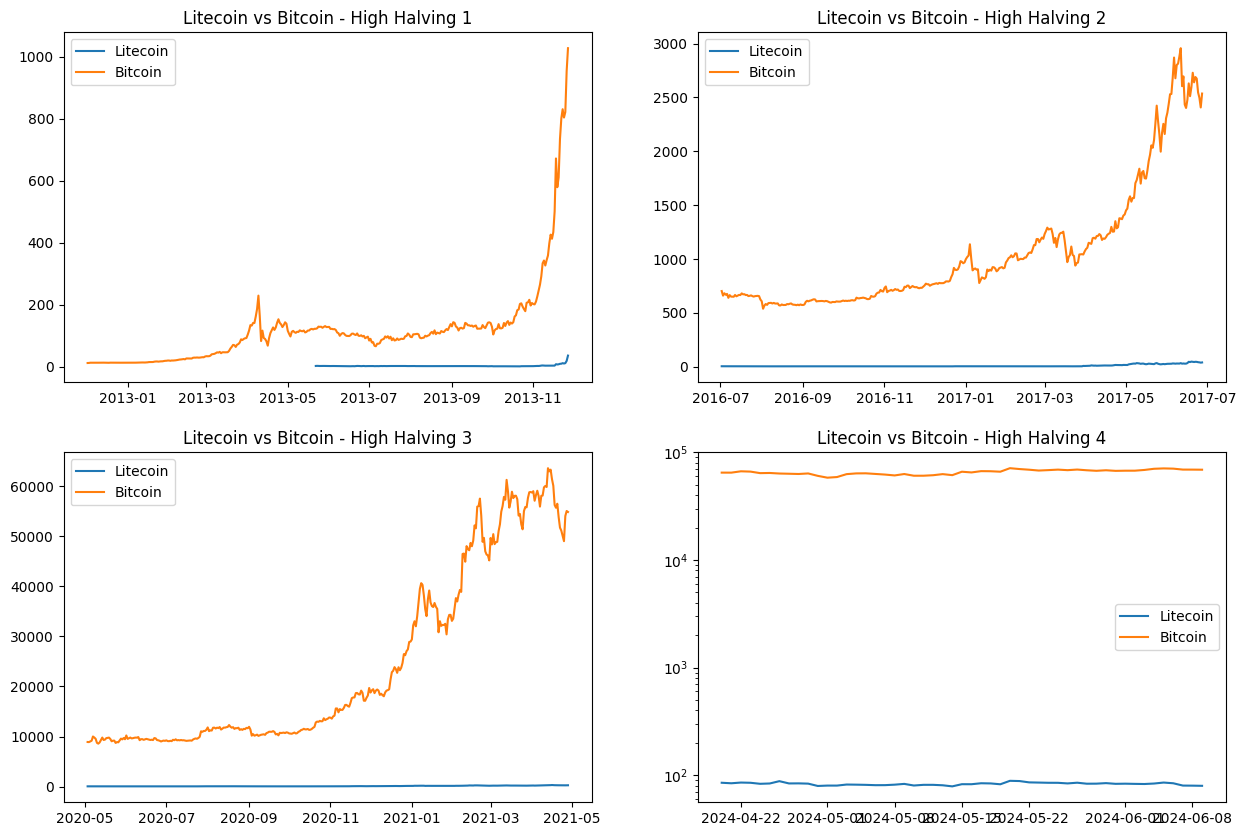

In [323]:
plot_by_coins_and_halving("Litecoin","Bitcoin")

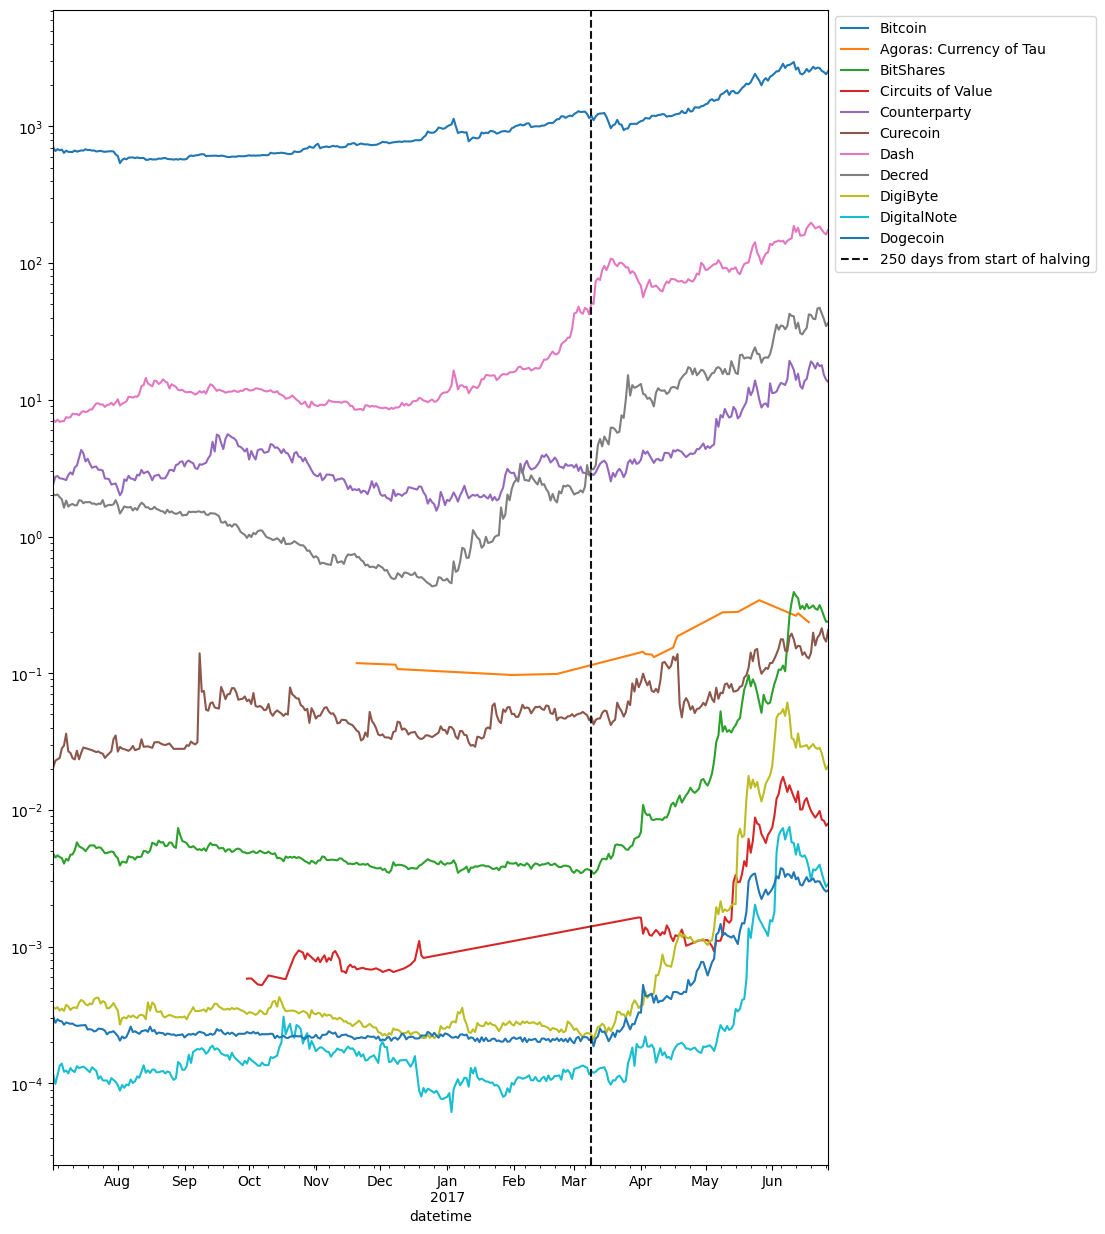

In [324]:
def plot_by_halving(halving: pd.DataFrame, always_show_coin: str = "Bitcoin", limit_coins: int = 10):
    plt.figure(figsize=(10, 15))
    ax = plt.gca()
    ax.set_yscale('log')

    # Encuentra la fecha mínima (inicio) entre todos los grupos
    start_date = halving.index.min()
    # Calcula la fecha objetivo sumando 250 días a la fecha de inicio
    target_date = start_date + pd.DateOffset(days=250)

    # Extrae y plotea el grupo para la moneda que siempre se debe mostrar
    always_show_group = halving[halving['name'] == always_show_coin]
    if not always_show_group.empty:
        always_show_group.sort_index().plot.line(y="close", label=always_show_coin, ax=ax)

    # Inicializa un contador para los grupos
    counter = 0
    for name, group in halving.groupby("name"):
        if name != always_show_coin:  # Evita incluir la moneda que ya se ha ploteado
            if counter < limit_coins:  # Verifica si aún no se ha alcanzado el límite
                sorted_group = group.sort_index()
                sorted_group.plot.line(y="close", label=name, ax=ax)
                counter += 1  # Incrementa el contador
            else:
                break  # Sale del bucle una vez que se alcanza el límite de monedas

    # Trazar una línea vertical en la fecha objetivo
    ax.axvline(x=target_date, color='#111', linestyle='--', label='250 days from start of halving')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
# Asumiendo que df_high_halving_2 está definido previamente y correctamente indexado por fecha
plot_by_halving(df_halving_2)

In [325]:
df_years = create_df_years()

In [326]:
df_years.set_index("datetime", inplace=True)

In [327]:
def plot_all_time(coins: pd.DataFrame, min_start_date: str = None, always_show_coin: str = "Bitcoin", limit_coins: int = 10):
    plt.figure(figsize=(10, 15))
    ax = plt.gca()
    ax.set_yscale('log')

    # Filtra las monedas que tienen datos desde antes de la fecha especificada
    if min_start_date is not None:
        min_start_date = pd.to_datetime(min_start_date)
        filtered_coins = coins.groupby('name').filter(lambda x: x.index.min() < min_start_date)
    else:
        filtered_coins = coins

    # Calcula la fecha objetivo sumando 250 días a la fecha de inicio de los halvings
    first_halving = pd.to_datetime(HALVINGS_DATE[0]) 
    second_halving = pd.to_datetime(HALVINGS_DATE[1]) 
    third_halving = pd.to_datetime(HALVINGS_DATE[2])
    fourth_halving = pd.to_datetime(HALVINGS_DATE[3]) 
    
    # Extrae y plotea el grupo para la moneda que siempre se debe mostrar
    always_show_group = filtered_coins[filtered_coins['name'] == always_show_coin]
    if not always_show_group.empty:
        always_show_group.sort_index().plot.line(y="close", label=always_show_coin, ax=ax)

    # Inicializa un contador para los grupos
    counter = 0
    for name, group in filtered_coins.groupby("name"):
        if name != always_show_coin:  # Evita incluir la moneda que ya se ha ploteado
            if counter < limit_coins:  # Verifica si aún no se ha alcanzado el límite
                sorted_group = group.sort_index()
                sorted_group.plot.line(y="close", label=name, ax=ax)
                counter += 1  # Incrementa el contador
            else:
                break  # Sale del bucle una vez que se alcanza el límite de monedas

    # Trazar una línea vertical en la fecha objetivo de los halvings
    ax.axvline(x=first_halving, color='#111', linestyle='--', label='First_halving')
    ax.axvline(x=first_halving + pd.DateOffset(days=250), color='red', linestyle='--', label='250 days from the first_halving')
    ax.axvline(x=second_halving, color='#111', linestyle='--', label='Second_halving')
    ax.axvline(x=second_halving + pd.DateOffset(days=250), color='red', linestyle='--', label='250 days from the second_halving')
    
    ax.axvline(x=third_halving, color='#111', linestyle='--', label='Third_halving')
    ax.axvline(x=third_halving + pd.DateOffset(days=250), color='red', linestyle='--', label='250 days from the third_halving')
    ax.axvline(x=fourth_halving, color='#111', linestyle='--', label='Fourth_halving')
    ax.axvline(x=fourth_halving + pd.DateOffset(days=250), color='red', linestyle='--', label='250 days from the fourth_halving')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

C:\Users\pms_l\AppData\Local\Temp\ipykernel_62364\256165070.py:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fourth_halving = pd.to_datetime(HALVINGS_DATE[3])


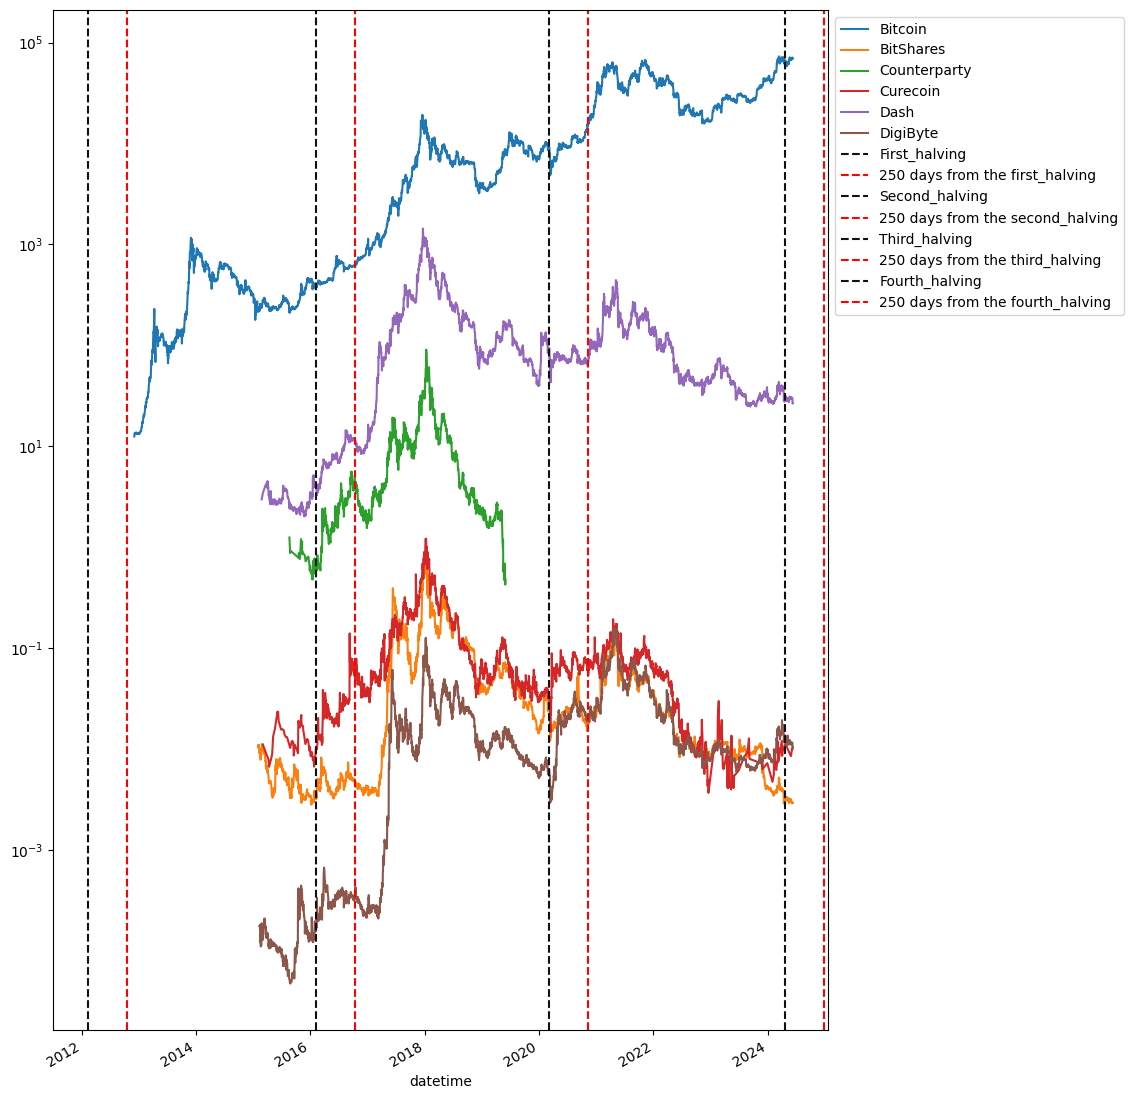

In [328]:
plot_all_time(df_years,limit_coins=5,min_start_date=HALVINGS_DATE[1])

# Creamos el dataset para el entrenamiento

In [329]:
# Cargamos la informacion de las monedas actualmente
df_coins: pd.DataFrame = pd.read_json('../../datasets/json/coins_clean.json', orient='records')

In [140]:
def calculate_levelup(v1: float, v2: float) -> float:
    """
    Calcula el nivel de crecimiento entre dos valores.
    :param v1: Valor inicial.
    :param v2: Valor final.
    """
    if v1 == 0 or v2 == 0:
        return 0.0
    return float((v2 - v1) / v1)

In [331]:
def get_data_dates(group: pd.DataFrame, MD: int, ED: int, halving: str):
    start_date = get_datetime(halving)
    if not (start_date in group.index):
        return (-1, -1, -1)
    middle_date = start_date + pd.DateOffset(days=MD)
    if not (middle_date in group.index):
        middle_date = 0
    end_date = start_date + pd.DateOffset(days=ED)
    if not (end_date in group.index):
        end_date = 0
    start = -1 if not start_date else group.loc[[start_date]].close.values[0]
    middle = -1 if not middle_date else group.loc[[middle_date]].close.values[0]
    end = -1 if not end_date else group.loc[[end_date]].close.values[0]
    return (
        start,
        middle,
        end,
    )

In [332]:
def create_halving_data(group:pd.DataFrame,halving: str, MD: int, ED: int) -> dict:
    h_start, h_md, h_ed = get_data_dates(group, MD, ED, halving)
    new_halving = {
        "h_start": h_start,
        f"h_{MD}d": h_md,
        f"h_{ED}d": h_ed,
        f"h_{MD}d_change": calculate_levelup(h_start, h_md),
        f"h_{ED}d_change": calculate_levelup(h_start, h_ed),
        "h_max": group.close.max(),
    }
    return new_halving

In [333]:
def get_data_dates(group: pd.DataFrame, MD: int, ED: int, halving: str):
    start_date = get_datetime(halving)
    if not (start_date in group.index):
        return (0, 0, 0)
    middle_date = start_date + pd.DateOffset(days=MD)
    if not (middle_date in group.index):
        middle_date = 0
    end_date = start_date + pd.DateOffset(days=ED)
    if not (end_date in group.index):
        end_date = 0
    start = -1 if not start_date else group.loc[[start_date]].close.values[0]
    middle = 0 if not middle_date else group.loc[[middle_date]].close.values[0]
    end = 0 if not end_date else group.loc[[end_date]].close.values[0]
    return (
        start,
        middle,
        end,
    )

In [334]:
def get_flag(group: pd.DataFrame, halving:str):
    start_date = get_datetime(halving)
    if not (start_date in group.index):
        return -1
    interval_date = start_date + pd.DateOffset(days=360)
    if not (interval_date in group.index):
        return -1
    h_start_price = group.loc[[start_date]].close.values[0]
    h_max_price = group.loc[start_date : ].close.max()
    if(h_max_price/h_start_price) > 15.0:
        return 1 # Flag 1 -> 10x
    return 0 # Flag 0 -> No 10x

In [335]:
def create_supervised_dataset(dataset: pd.DataFrame, halving: str) -> pd.DataFrame:
    df_group = dataset.groupby("name")
    data = []
    # variables
    MD = 150  # 5 meses
    ED = 304  # 10 meses
    for name, group in df_group:
        h = create_halving_data(group, halving, MD, ED)

        new_coin = {
            "name": name,
            # Halving 2016
            "h_start": h["h_start"],
            f"h_{MD}d": h[f"h_{MD}d"],
            f"h_{MD}d_change": h[f"h_{MD}d_change"],
            f"h_{ED}d": h[f"h_{ED}d"],
            f"h_{ED}d_change": h[f"h_{ED}d_change"],
            "h_max": h["h_max"],
            # Flag
            "flag": get_flag(group, halving)
        }
        data.append(new_coin)
        # add to the df
    df = pd.DataFrame(data)
    return df


df_test_2 = create_supervised_dataset(df_years, HALVINGS_DATE[1])
df_test_2.drop(df_test_2[df_test_2["flag"] == -1].index, inplace=True)

df_test_3 = create_supervised_dataset(df_years, HALVINGS_DATE[2])
df_test_3.drop(df_test_3[df_test_3["flag"] == -1].index, inplace=True)

In [336]:
df_test_3.flag.value_counts()

flag
1    110
0     95
Name: count, dtype: int64

In [337]:
df_test_3.to_json('./datasets/supervised_dataset_3.json', orient='records')

In [338]:
df_years["datetime"] = df_years.index
df_years.to_json('./datasets/market_data.json', orient='records')

# Creamos un nuevo dataset

In [1]:
import random

In [4]:
market_data = pd.read_json("./datasets/market_data.json", orient="records")
market_data.set_index("datetime", inplace=True)

In [17]:
market_data[:1]

,id,serialId,symbol,name,slug,open,high,low,close,volume
datetime,,,,,,,,,,
2013-10-21,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,184.229754,195.180881,166.07,184.776243,1.005583e+07


In [131]:
def get_coins_interval(start: str, end: str, df: pd.DataFrame):
    new_df = pd.DataFrame()
    for name, group in df.groupby("name"):
        new_group = group[(group.index >= start) & (group.index <= end) & (group.index.min() <= pd.to_datetime(start))]
        new_df = pd.concat([new_df, new_group])
    return new_df.sort_index()

In [132]:
df_test = get_coins_interval(HALVINGS_DATE[1], HALVINGS_DATE[2], market_data)
df_test

,id,serialId,symbol,name,slug,open,high,low,close,volume
datetime,,,,,,,,,,
2016-02-07,21c795f5-1bfd-40c3-858e-e9d7e820c6d0,6059,ETH,Ethereum,ethereum,2.519467,3.085671,2.429794,2.960402,3.125688e+06
2016-02-07,83e4940c-70ba-4a6e-856b-686b6f9c487e,5898,XEM,NEM,new-economy-movement,0.000621,0.000641,0.000580,0.000608,8.533833e+03
2016-02-07,7c435a77-5be9-4424-b5d1-1c02b968c56f,378,XLM,Stellar,stellar,0.001838,0.001844,0.001809,0.001844,7.458539e+02
2016-02-07,b0566b33-a751-41bf-8c7c-c48f7bf37522,1886,CURE,Curecoin,curecoin,0.009813,0.010281,0.009813,0.010281,1.717438e+01
2016-02-07,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,376.030182,382.416109,372.510785,376.678016,4.532929e+08
...,...,...,...,...,...,...,...,...,...,...
2020-03-05,83e4940c-70ba-4a6e-856b-686b6f9c487e,5898,XEM,NEM,new-economy-movement,0.052688,0.055493,0.052301,0.053836,6.897779e+06
2020-03-05,2cffe1ba-a84e-479c-92c3-ab20bf775c4d,1355,PPC,Peercoin,peercoin,0.224136,0.226644,0.214225,0.225045,1.080226e+04
2020-03-05,3e6d2d8e-b4c8-4738-837c-bc29d948fc7c,94,DGB,DigiByte,digibyte,0.006140,0.006549,0.005960,0.006346,2.511931e+05


In [200]:
CATEGORICAL_COLS = df_test.select_dtypes(include=['object']).columns
NUMERIC_COLS =df_test.select_dtypes(include=['float64', 'int64']).columns
COLUMNS = ["open", "high", "low", "close", "volume"]

In [165]:
def prepare_coin(coin: pd.DataFrame):
    for column in COLUMNS:
        coin[f"prev_{column}"] = coin[column].shift(1)
    # Eliminamos la primera fila
    coin.dropna(inplace=True)
    return coin

In [166]:
def features_coin(coin: pd.DataFrame):
    columns_prev = list(map(lambda x: f"prev_{x}", COLUMNS))
    new_coin = coin.copy()
    for column, column_prev in zip(COLUMNS, columns_prev):
        new_coin[f"change_{column}"] = new_coin.apply(lambda x: calculate_levelup(x[column_prev], x[column]), axis=1) 
        
    new_coin.drop(columns=COLUMNS, inplace=True)
    new_coin.drop(columns=columns_prev, inplace=True)
    return new_coin

In [261]:
def inject_behaviour(coin: pd.DataFrame, bitcoin: pd.DataFrame):
    new_coin = coin.copy()
    bitcoin["datetime"] = bitcoin.index
    bitcoin.to_json('./datasets/bitcoin.json', orient='records')
    del bitcoin["datetime"]
    bitcoin.drop(columns= CATEGORICAL_COLS, inplace=True)
    bitcoin.drop(columns= NUMERIC_COLS[0], inplace=True)
    # Change name for the columns
    bitcoin.columns = list(map(lambda x: f"bitcoin_{x}", bitcoin.columns))
    
    # merge on the index
    new_coin = pd.merge(new_coin, bitcoin, on="datetime", how="inner")
    return new_coin

In [262]:
def get_coin(df: pd.DataFrame):
    new_df = df.groupby("name")
    coins_names = list(new_df.groups.keys())
    coin = new_df.get_group(random.choice(coins_names))
    bitcoin = new_df.get_group("Bitcoin")

    prepare_coin(coin)
    prepare_coin(bitcoin)
    coin = features_coin(coin)
    bitcoin = features_coin(bitcoin)
    coin = inject_behaviour(coin,bitcoin)
    return coin,bitcoin

In [ ]:
coin,bitcoin = get_coin(df_test)

In [264]:
coin

,id,serialId,symbol,name,slug,open,high,low,close,volume,...,bitcoin_open,bitcoin_high,bitcoin_low,bitcoin_close,bitcoin_volume,bitcoin_change_open,bitcoin_change_high,bitcoin_change_low,bitcoin_change_close,bitcoin_change_volume
datetime,,,,,,,,,,,,,,,,,,,,,
2016-02-09,7dd394c7-f6ea-4128-b251-72fe7fdbc17d,2964,SYS,Syscoin,syscoin,0.000547,0.000579,0.000543,0.000568,151.877384,...,374.366660,377.633699,371.134725,374.419881,4.221380e+08,-0.009152,-0.011700,0.000076,0.003614,-0.070071
2016-02-10,7dd394c7-f6ea-4128-b251-72fe7fdbc17d,2964,SYS,Syscoin,syscoin,0.000542,0.000612,0.000516,0.000577,321.547248,...,375.245206,385.045611,373.279047,380.798141,6.877410e+08,0.002347,0.019627,0.005778,0.017035,0.629185
2016-02-11,7dd394c7-f6ea-4128-b251-72fe7fdbc17d,2964,SYS,Syscoin,syscoin,0.000540,0.000561,0.000524,0.000561,244.764341,...,380.679593,384.303153,373.702775,379.643758,4.435501e+08,0.014482,-0.001928,0.001135,-0.003031,-0.355062
2016-02-12,7dd394c7-f6ea-4128-b251-72fe7fdbc17d,2964,SYS,Syscoin,syscoin,0.000558,0.000880,0.000558,0.000880,419.989658,...,379.713533,386.464192,377.246035,384.791546,5.429746e+08,-0.002538,0.005623,0.009481,0.013560,0.224156
2016-02-13,7dd394c7-f6ea-4128-b251-72fe7fdbc17d,2964,SYS,Syscoin,syscoin,0.000840,0.001172,0.000707,0.001069,2369.789614,...,383.791073,392.759929,383.791073,392.318594,6.038379e+08,0.010738,0.016291,0.017350,0.019561,0.112092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,7dd394c7-f6ea-4128-b251-72fe7fdbc17d,2964,SYS,Syscoin,syscoin,0.026979,0.030872,0.026729,0.028325,913297.851168,...,8535.687224,8749.946700,8436.449138,8534.006503,7.940752e+09,-0.020065,-0.008813,-0.011980,-0.000819,0.091479
2020-03-02,7dd394c7-f6ea-4128-b251-72fe7fdbc17d,2964,SYS,Syscoin,syscoin,0.028118,0.030428,0.028118,0.030044,104528.176121,...,8529.127861,8967.306210,8495.179937,8913.712102,1.032956e+10,-0.000768,0.024841,0.006962,0.044493,0.300829
2020-03-03,7dd394c7-f6ea-4128-b251-72fe7fdbc17d,2964,SYS,Syscoin,syscoin,0.030152,0.030436,0.029141,0.029415,60722.782486,...,8919.626755,8927.846467,8667.751738,8759.008909,1.027370e+10,0.045784,-0.004400,0.020314,-0.017356,-0.005408


In [265]:
# add datetime before
coin["datetime"] = coin.index
coin.to_json('./datasets/coin.json', orient='records')